# **Лабораторная работа №1** 





# Вариант 16



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t_min = 14 # Начальное время сигнала, с
t_max = 26 # Конечное время сигнала, с
a = 10 # Амплитуда сигнала, В
a_0 = 5 # Начальная амплитуда сигнала, В
f = 5 # Частота сигнала, Гц
fd = 80 # Частота дискретизации, Гц (По т. Котельникова fd > 2f) 
pfi = np.pi / 5
b = 4 # Разрядность АЦП
# Прямой код

#**Моделирование аналогового сигнала**





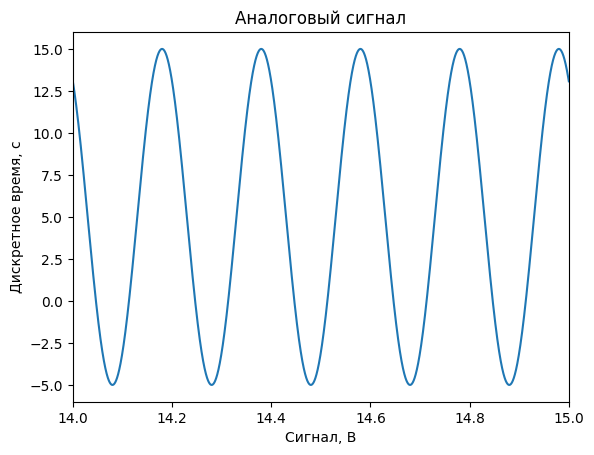

In [ ]:
x = np.arange(t_min, t_max, 0.0001) # Время по оси X
y = a_0 + a * np.cos(2 * np.pi * x * f + pfi) # Амплитуда по оси Y
plt.title("Аналоговый сигнал")
plt.xlabel("Сигнал, В")
plt.ylabel("Дискретное время, с")
plt.xlim([14, 15])
plt.plot(x, y)

#**Моделирование дискретного сигнала**




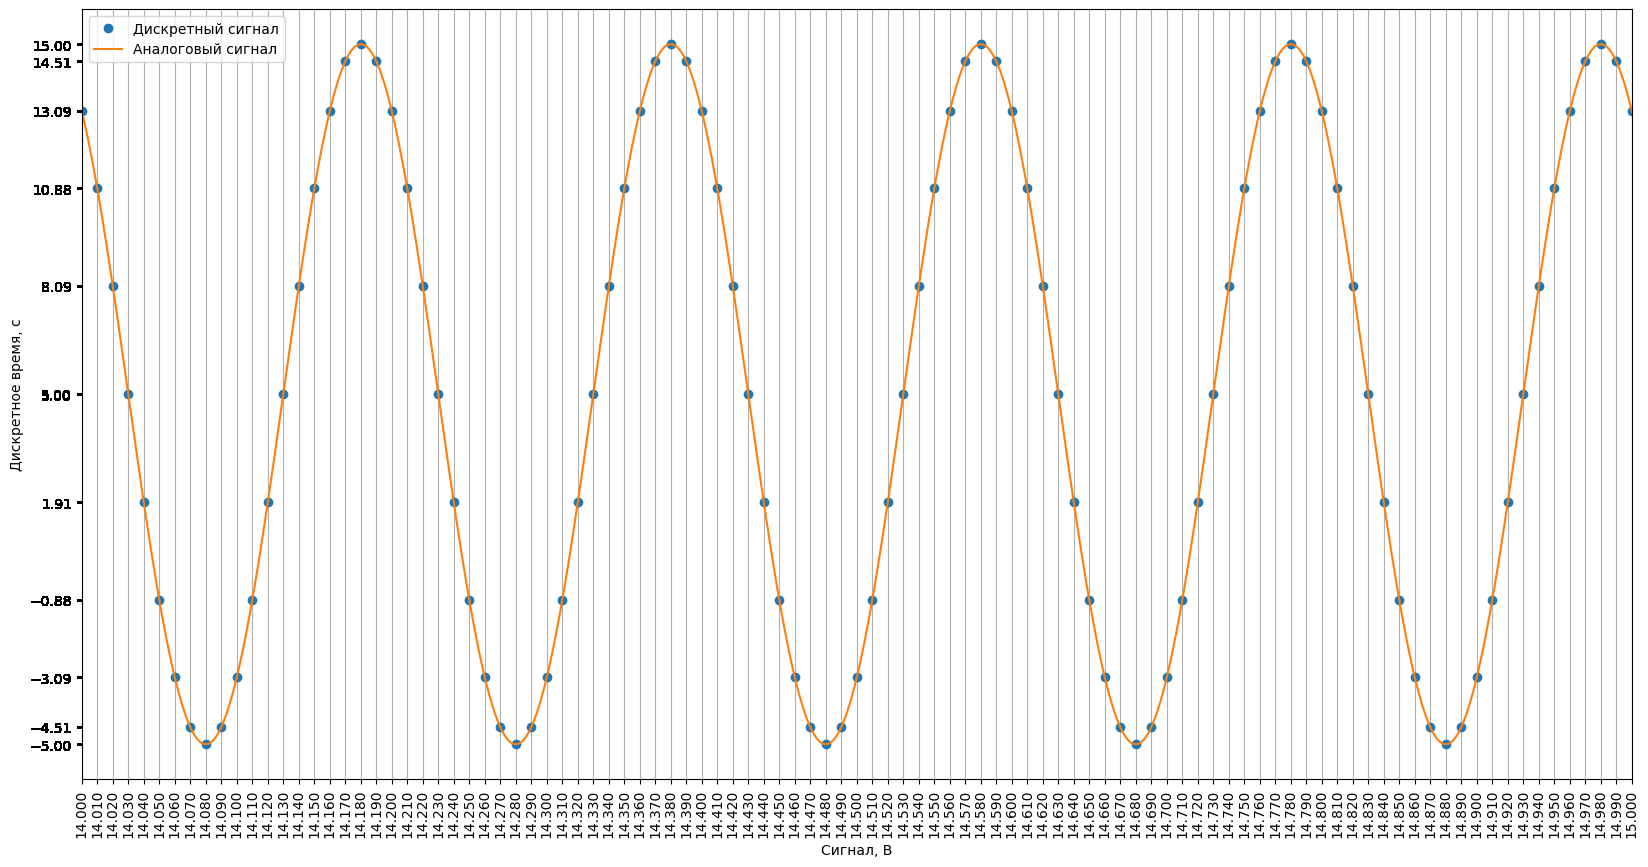

In [ ]:
step = round((t_max - t_min + 1) / np.around((t_max - t_min) * fd), 2) # Шаг для равномерного снятия отсчетов, так как np.linspace() не оругляет шаг до нужного количества значений после запятой. Повышать количество знаков при увеличении частоты диск
td = np.arange(t_min, t_max + 1, step) # Область определения
y_d1 = a_0 + a * np.cos(2 * np.pi * td * f + pfi) # Амплитуда по оси Y

plt.figure(figsize=(20, 10)) # размер графика
plt.gca().xaxis.set_major_formatter('{:.3f}'.format)
plt.grid(axis = 'x')
plt.plot(td, y_d1, 'o')
plt.xticks(td, rotation=90, fontsize=10)
plt.yticks(y_d1)
plt.xlabel("Сигнал, В")
plt.ylabel("Дискретное время, с")
plt.xlim([14, 15])
plt.plot(x, y)
plt.legend(["Дискретный сигнал", "Аналоговый сигнал"])

#**Моделирование Квантованного сигнала**



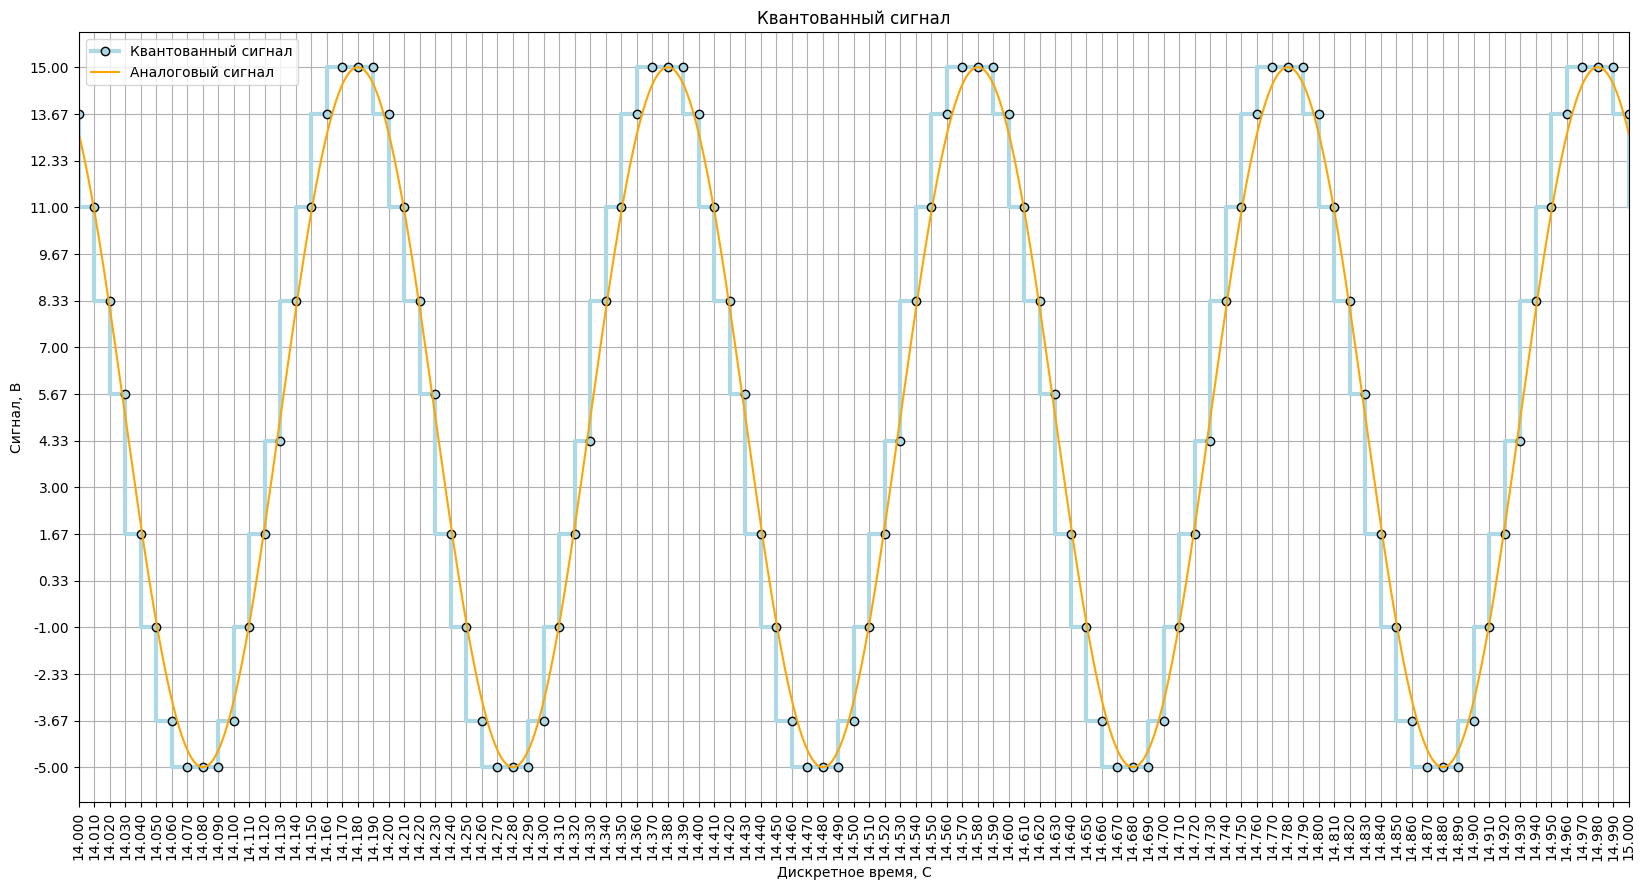

In [ ]:
n = 2 ** b  # Количество уровней квантования
min_val = np.min(y_d1) # Минимальное значение амлитуды
max_val = np.max(y_d1) # Максимальное значение амлитуды
Dq = (max_val - min_val) / (n - 1) # Шаг квантования (Почему n - 1?)
levels = np.arange(min_val + Dq / 2, max_val - Dq / 2 + Dq, Dq) # Уровни сравнения сигнала (Почему определяются так?)
codebook = np.arange(min_val, max_val + Dq, Dq) # Уровни квантования 
ind = np.digitize(y_d1, levels) # Разбиваем дискретный входной сигнал на интервалы
xq = codebook[ind] # Квантуем значения входного сигнала

plt.figure(figsize=(20, 10))
plt.step(td, xq, 'o-', color='lightblue', linewidth=3, markeredgecolor='black')
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)
plt.gca().xaxis.set_major_formatter('{:.3f}'.format)
plt.grid(True)
plt.yticks(codebook)
plt.xticks(td, rotation=90, fontsize=10)
plt.xlim([14, 15])
plt.plot(x, y, color='orange')
plt.title("Квантованный сигнал")
plt.xlabel("Дискретное время, С")
plt.ylabel("Сигнал, В")
plt.legend(["Квантованный сигнал", "Аналоговый сигнал"])

#**Моделирование Цифрового Сигнала в прямом коде**



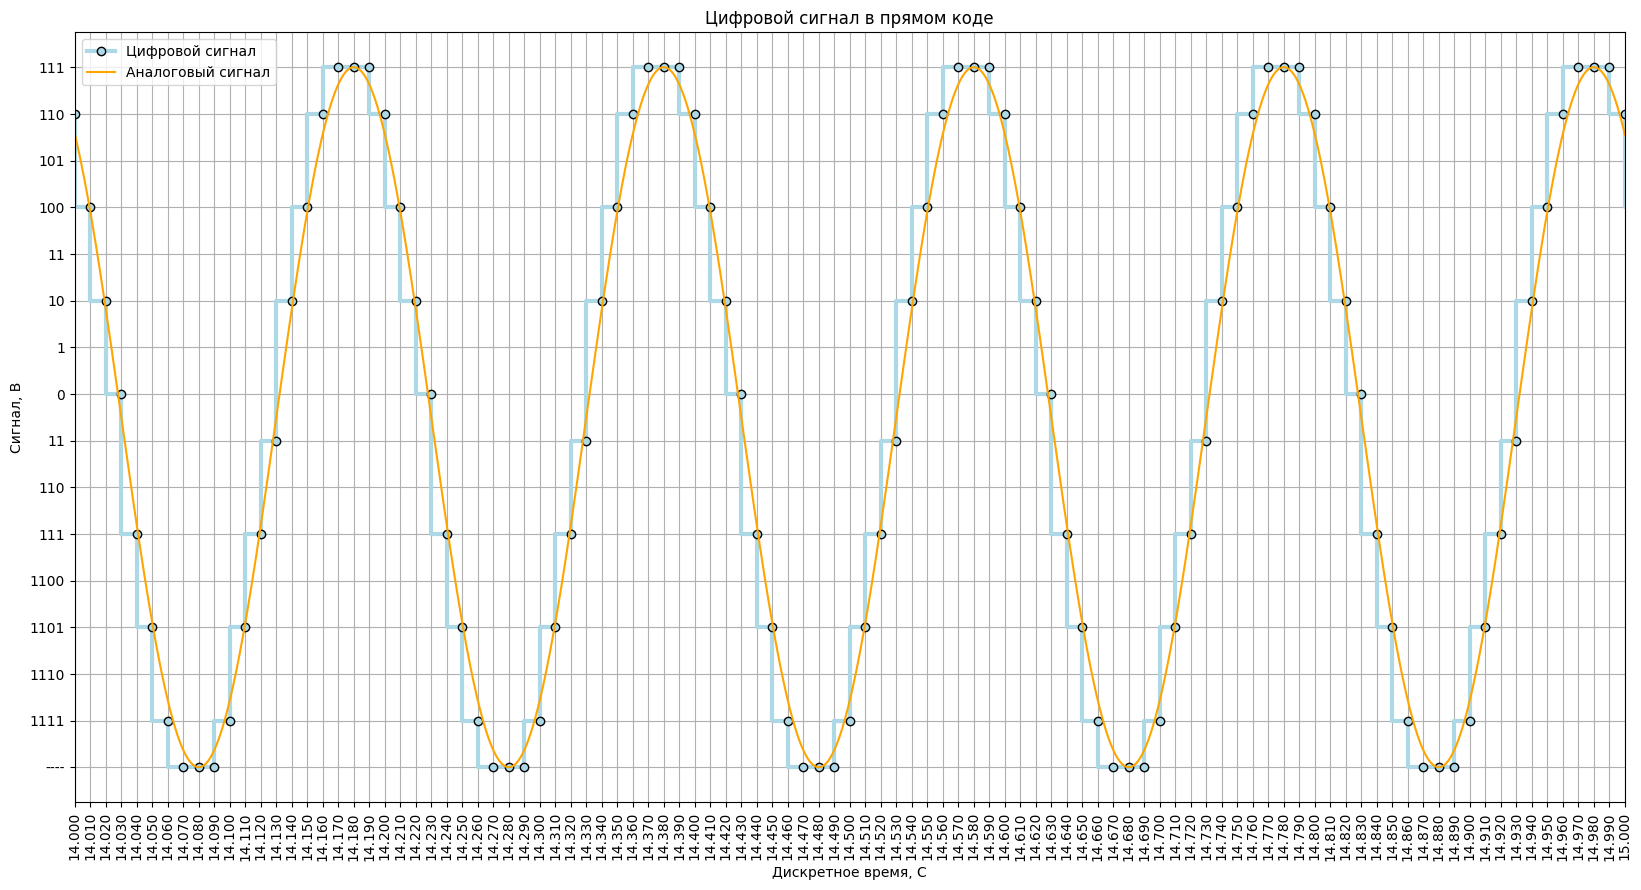

In [ ]:
def binaryzation(arr):
  result = []
  for digit in arr:
    if digit < 0:
      digit = list(str(digit))
      digit[0] = '1'
      result.append(''.join(digit))
    else:
      result.append(str(digit))
  result[0] = '----'
  return result


codes = np.arange(-(n // 2), n // 2)
bincodes = np.fromiter(map(np.binary_repr, codes), dtype=int)

plt.figure(figsize=(20, 10))
plt.step(td, xq, 'o-', color='lightblue', linewidth=3, markeredgecolor='black')
plt.gca().xaxis.set_major_formatter('{:.3f}'.format)
plt.grid(True)
plt.yticks(codebook, binaryzation(bincodes))
plt.xticks(td, rotation=90, fontsize=10)
plt.xlim([14, 15])
plt.plot(x, y, color='orange')
plt.title("Цифровой сигнал в прямом коде")
plt.xlabel("Дискретное время, С")
plt.ylabel("Сигнал, В")
plt.legend(["Цифровой сигнал", "Аналоговый сигнал"])


# **Вычисление погрешности цифрового сигнала**

Text(0, 0.5, 'Погрешность, В')

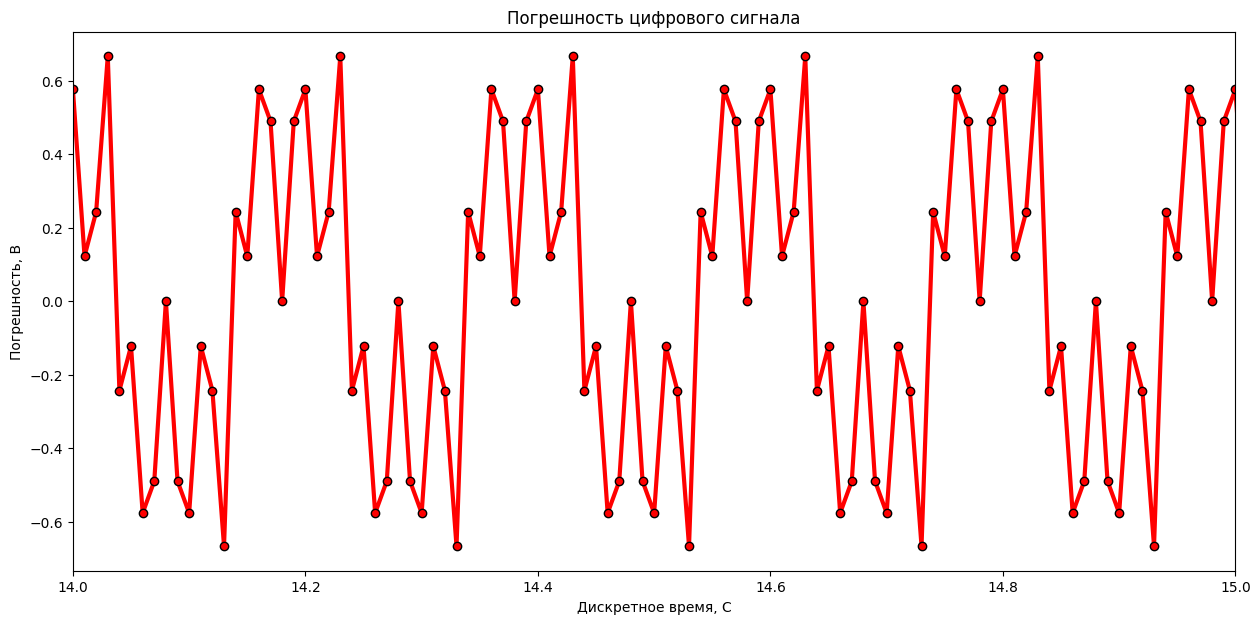

In [ ]:
ex = xq - y_d1

plt.figure(figsize=(15, 7))
plt.plot(td, ex, 'o-', color='red', linewidth=3, markeredgecolor='black')
plt.xlim([14, 15])
plt.title("Погрешность цифрового сигнала")
plt.xlabel("Дискретное время, С")
plt.ylabel("Погрешность, В")

# **Формирование гистограммы статистического распределения погрешности**

Text(0, 0.5, 'Плотность вероятности, 1/В')

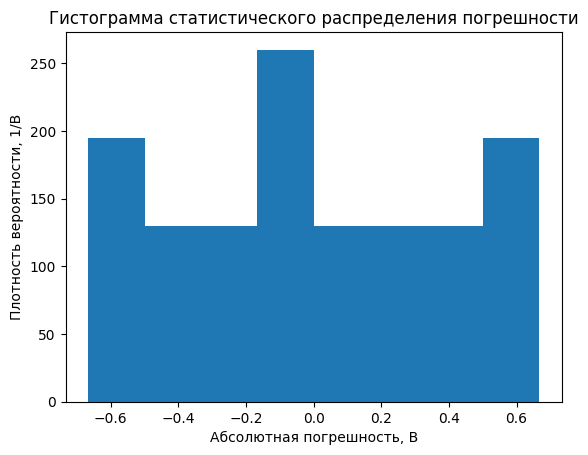

In [ ]:
# bars = 8
# edges = np.linspace(min_val / (n - 1), max_val / (n - 1) + bars + 1, bars + 1)

plt.hist(ex, bins=8)
plt.title("Гистограмма статистического распределения погрешности")
plt.xlabel("Абсолютная погрешность, В")
plt.ylabel("Плотность вероятности, 1/В")